# 1. Hồi qui Logistic

Các mô hình phân loại đều tìm cách xác định đường biên phân chia tốt nhất các nhóm giữa liệu. Trong hồi qui Logistic chúng ta cũng tìm kiếm một đường biên phân chia như vậy để giải quyết bài toán phân loại nhị phân giữa hai nhóm 0 và 1.

<!-- ![](https://i.imgur.com/pVWaYTt.jpeg) -->

Trong hồi qui tuyến tính chúng ta dựạ vào một hàm hồi qui giả thuyết $h_{\mathbf{w}}(\mathbf{x}) = \mathbf{w}^{\intercal}\mathbf{x}$ để dự báo biến mục tiêu liên tục $y$. Vì giá trị của $y$ có thể vượt ngoài khoảng $[0, 1]$ nên trong hồi qui Logistic cần một hàm số có tác dụng chiếu giá trị dự báo lên không gian xác suất nằm trong khoảng $[0, 1]$ và đồng thời tạo ra tính phi tuyến cho phương trình hồi qui nhằm giúp nó có đường biên phân chia giữa hai nhóm tốt hơn. Đó chính là hàm Sigmoid hoặc hàm Logistic mà chúng ta sẽ tìm hiểu bên dưới.

## 1.1. Hàm sigmoid

Mô hình hồi qui _Logistic_ là sự tiếp nối ý tưởng của hồi qui tuyến tính vào các bài toán phân loại. Từ đầu ra của hàm tuyến tính chúng ta đưa vào hàm _Sigmoid_ để tìm ra phân phối xác suất của dữ liệu. Lưu ý rằng hàm _Sigmoid_ chỉ được sử dụng trong bài toán phân loại nhị phân. Đối với bài toán phân loại nhiều hơn hai nhãn, hàm _Softmax_ (sẽ được tìm hiểu ở những chương sau) là một dạng hàm tổng quát của _Sigmoid_ sẽ được sử dụng. Hàm _Sigmoid_ thực chất là một hàm biến đổi phi tuyến dựa trên công thức:

$$\sigma{(x)} = \frac{1}{1+e^{-x}}$$

Bên dưới là khảo sát sơ bộ của hàm _Sigmoid_.

In [1]:
import numpy as np

x = np.linspace(-10, 10, 200)

def _sigmoid(x):
  s = 1/(1+np.exp(-x))
  return s

# Xác suất dự báo từ hàm sigmoid
y = [_sigmoid(xi) for xi in x]

Vẽ đồ thị hàm _Sigmoid_:

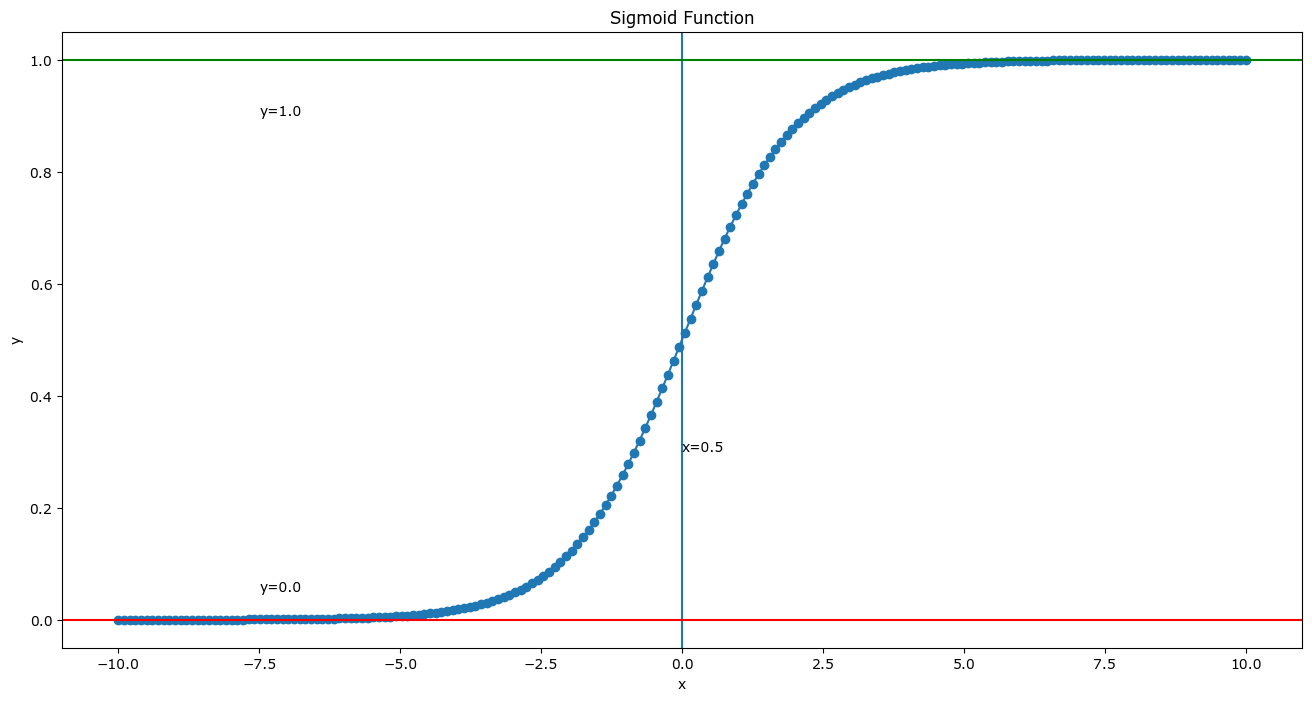

In [2]:
import matplotlib.pyplot as plt
# Visualize hàm sigmoid

plt.figure(figsize = (16, 8))
plt.plot(x, y, marker = 'o')
plt.axvline(0)
plt.text(0.0, 0.3, "x=0.5")
plt.axhline(1, color="green")
plt.text(-7.5, 0.9, "y=1.0")
plt.axhline(0, color="red")
plt.text(-7.5, 0.05, "y=0.0")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid Function')
plt.show()

Ta nhận thấy: Hàm `Sigmoid` có hình dạng là một **đường cong chữ `S`** và **đơn điệu tăng**. Chính vì thế nên nó còn có tên một tên gọi khác là hàm chữ `S`. Một vài tài liệu còn gọi nó là hàm `Logistic` đại diện cho hồi qui `Logistic`.

Ngoài ra ta dễ dàng chứng minh giá trị của hàm `Sigmoid` nằm trong khoảng $[0, 1]$. Thật vậy:

$$\lim_{x \rightarrow +\infty} \sigma(x) = \lim_{x \rightarrow +\infty} \frac{1}{1+e^{-x}}=1$$

và

$$\lim_{x \rightarrow -\infty} \sigma(x) = \lim_{x \rightarrow -\infty} \frac{1}{1+e^{-x}}=0$$

Do đó hàm `Sigmoid` rất phù hợp để áp dụng vào dự báo xác suất ở các bài toán phân loại.

Quay trở lại với bài toán hồi qui tuyến tính. Với 2 biến đầu vào dự báo là $\mathbf{x} = (1, x_1, x_2)$ ta thu được một hàm hồi qui:

$$\hat{y} = g(x) = w_0 + w_1 x_1 + w_2 x_2 = \mathbf{w}^{\intercal}\mathbf{x}$$

Ở đây $\mathbf{w} = (w_0, w_1, w_2)$ là véc tơ dòng của các hệ số hồi qui.

Chuyển tiếp giá trị này qua hàm _Sigmoid_ để dự báo xác suất và tạo tính phi tuyến cho mô hình hồi qui:

$$P(y=1 | \mathbf{x}; \mathbf{w}) = \sigma(\mathbf{w}^\intercal\mathbf{x}) = \frac{1}{1+e^{-\mathbf{w}^\intercal\mathbf{x}}}$$

Ở công thức trên thì $P(y=1 | \mathbf{x}; \mathbf{w})$ chính là xác suất có điều kiện để xảy ra sự kiện $y=1$ tương ứng với đầu vào $\mathbf{x}$, và trọng số $\mathbf{w}$. Lưu ý chúng ta không thể viết xác suất có điều kiện theo $\mathbf{w}$ là $P(y=1 | \mathbf{x}, \mathbf{w})$ vì $\mathbf{w}$ không phải là biến ngẫu nhiên.

## 1.2. Đường biên phân chia của hàm Sigmoid

Trong bài toán phân loại nhị phân chúng ta sẽ lựa chọn một ngưỡng threshold về xác suất để đưa ra dự báo nhãn cho một quan sát. Giả định ta chọn ngưỡng xác suất là 0.5. Khi đó dự báo nhãn sẽ là:


$$
\left\{
\begin{matrix}
0 \text{ if } P(y=1|\mathbf{x}; \mathbf{w}) \leq 0.5 \\
1 \text{ if } P(y=1|\mathbf{x}; \mathbf{w}) > 0.5
\end{matrix}
\right.$$

* Trong trường hợp $y=1$:

$$\begin{eqnarray}h_{\mathbf{w}}(\mathbf{x}) & > & 0.5 \\
& \leftrightarrow & \frac{1}{1+e^{-\mathbf{w}^{\intercal}\mathbf{x}}} > 0.5 \\
& \leftrightarrow & e^{-\mathbf{w}^{\intercal}\mathbf{x}} < 1 \\
& \leftrightarrow & \mathbf{w}^{\intercal}\mathbf{x} > 0 \\
\end{eqnarray}$$

* Trong trường hợp $y=0$:

$$\begin{eqnarray}h_{\mathbf{w}}(\mathbf{x}) & \leq & 0.5 \\
& \leftrightarrow & \frac{1}{1+e^{-\mathbf{w}^{\intercal}\mathbf{x}}} \leq 0.5 \\
& \leftrightarrow & e^{-\mathbf{w}^{\intercal}\mathbf{x}} \geq 1 \\
& \leftrightarrow & \mathbf{w}^{\intercal}\mathbf{x} \leq 0 \\
\end{eqnarray}$$

_Thêm hình vẽ về đường biên phân chia_

Như vậy ta có thể nhận ra những điểm thuộc về nhãn 1 sẽ nằm bên phải đường biên phân chia $\mathbf{w}^{\intercal}\mathbf{x}$ trong khi những điểm thuộc về nhãn 0 sẽ nằm bên trái. Đồng thời đường biên phân chia hai nhãn 0 và 1 cũng là một phương trình tuyến tính.

## 1.3. Chỉ số Odd ratio

Odd ratio là một chỉ số đo lường tỷ lệ xác suất giữa trường hợp _tích cực_ và _tiêu cực_ được dự báo từ mô hình hồi qui logistic. Một dự đoán có tỷ lệ Odd ratio càng lớn thì khả năng rơi vào nhãn _tích cực_ sẽ càng cao. Nếu Odd ratio > 1 thì mẫu được dự báo có xác suất thuộc nhãn _tích cực_ là lớn hơn so với _tiêu cực_ và ngược lại.

$$\text{Odd Ratio} = \frac{P(y=1|\mathbf{x}; \mathbf{w})}{P(y=0|\mathbf{x}; \mathbf{w})} = \frac{P(y=1|\mathbf{x}; \mathbf{w})}{1-P(y=1|\mathbf{x}; \mathbf{w})} = e^{-\mathbf{w}^{\intercal}\mathbf{x}}$$

Ngoài ra để nhận biết xác suất _tích cực_ hay _tiêu cực_ lớn hơn, ta thường căn cứ vào log Odd Ratio bằng cách so sánh $\mathbf{w}^{\intercal}\mathbf{x}$ với 0 để đưa ra kết luận.

## 1.4. Biểu diễn đồ thị của hồi qui logistic

Chúng ta có thể xem hàm Sigmoid là một hàm phi tuyến giúp biến đổi giá trị đầu ra. Chúng ta sẽ còn gặp nhiều dạng hàm biến đổi phi tuyến khác trong các mô hình Softmax, MLP, SVM, ....

Dưới góc nhìn của graphic model thì mô hình Logistic regression có dạng như sau:

![](https://imgur.com/ppnjQrY.png)

Đồ thị trên sẽ bao gồm hai bước:

* **Bước 1**: Kết hợp tuyến tính.

Mỗi một node (hình tròn) đại diễn cho 1 biến đầu vào. Các cạnh là hình mũi tên có hướng thể hiện hướng tính toán của đồ thị. Đầu vào sẽ là node ở gốc mũi tên và đầu ra là node ở ngọn mũi tên? Giá trị này sẽ được điều tiết bằng cách nhân với hệ số $w_i$. Cuối cùng ta sẽ kết hợp tuyến tính các nodes đầu vào để tính ra đầu ra $\hat{y}$.

Về căn bản bước này tương đương với quá trình dự báo trong hồi qui tuyến tính.


* **Bước 2**: Biểu diễn hàm Sigmoid.

Giá trị $\hat{y}$ lại tiếp tục được đưa qua hàm $\sigma$ để tính ra xác suất $P(y=1)$ ở output.

## 1.5. Xác suất của Logistic và phân phối Bernoulli

Chúng ta còn nhớ về phân phối Bernoulli chứ? Giả sử một sự kiện vỡ nợ xảy ra với xác suất là $p$. Phân phối Bernoulli cho chúng ta biết xác suất xảy ra của sự kiện khi thực hiện một phép thử như sau:


$$P(X=k)={\begin{cases}p&{\text{if }}k=1,\\[6pt]1-p&{\text{if }}k=0.\end{cases}}$$


Tìm hiểu thêm về phân phối Bernoulli tại [Chương 2, phân phối xác suất Bernoulli](https://phamdinhkhanh.github.io/deepai-book/ch_probability/appendix_probability.html#phan-phoi-bernoulli).


Như vậy xác suất trong bài toán phân loại nhị phân tuân theo phân phối Bernoulli. Chúng ta còn có thể khái quát hoá xác suất này qua phương trình tổng quát cho cả hai trường hợp $0$ và $1$ như sau:

$$P(X=k) = p^{k}(1-p)^{1-k} \tag{1}$$

Thật vậy, trường hợp $k=1$ thì:

$$P(X=1)=p^{1}(1-p)^{0} = p$$

và tương tự với trường hợp $k=0$ ta cũng có:

$$P(X=0)=p^{0}(1-p)^{1} = 1-p$$

Xác suất xảy ra của điểm $\mathbf{x}_i$ theo hàm Sigmoid:

$$
\left\{
\begin{matrix}
    P(y=1| \mathbf{x}_i) &=& \sigma(\mathbf{w}^\intercal\mathbf{x}_i)~~~ \\
    P(y=0| \mathbf{x}_i) &=& 1-\sigma(\mathbf{w}^\intercal\mathbf{x}_i)~~~ 
\end{matrix}
\right.$$

Như vậy trong mô hình hồi qui Logistic, xác suất tổng quát cho một mẫu cho cả hai trường hợp $\{0, 1 \}$ sẽ là:

$$P(y_i|\mathbf{x}_i, \mathbf{w}) = P(y=1)^{y_i}(1-P(y=1))^{(1-y_i)}$$

Ở trên là xác suất tại một điểm dữ liệu. Giả sử các quan sát trong bộ dữ liệu của chúng ta là độc lập. Khi đó xác suất đồng thời của toàn bộ các quan sát trong bộ dữ liệu sẽ bằng tích các xác suất tại từng điểm dữ liệu và bằng:

$$P(\mathbf{y}|\mathbf{X}; \mathbf{w}) = \prod_{i=1}^{n} P(y_i|\mathbf{x}_i; \mathbf{w}) \tag{2}$$

Vế phải của biểu thức $(2)$ chính là một _hàm hợp lý_ (_Likelihood Function_) đo lường _mức độ hợp lý_ (_goodness of fit_) của mô hình thống kê đối với dữ liệu. 

Chúng ta kỳ vọng giá trị của _hàm hợp lý_ phải lớn. Điều đó đồng nghĩa với các trường hợp _tích cực_ phải có xác suất càng gần 1 và _tiêu cực_ có xác suất gần bằng 0. Do đó mục tiêu của chúng ta là tìm $\mathbf{w}$ sao cho biểu thức (2) là lớn nhất.

## 1.6. Ước lượng hợp lý tối đa (_Maximum Likelihood Estimation_) và Hàm Cross Entropy

Như vậy quá trình tìm nghiệm $\mathbf{w}$ thực chất là giải bài toán _tối ưu hàm hợp lý_ (_Maximum Likelihood Function_). Phương pháp tìm nghiệm $\mathbf{w}$ dựa trên hàm hợp lý còn được gọi là _ước lượng hợp lý tối đa_ (_Maximum Likelihood Estimation_). 

Do việc tối ưu trực tiếp $(2)$ là khó khăn nên chúng ta sẽ logarith để chuyển tích sang tổng để tối ưu nhẹ nhàng hơn. Khi đó qui về bài toán tối ưu hàm _Log Likelihood_ như sau:

$$\begin{eqnarray}\log P(y_i|\mathbf{x}_i; \mathbf{w}) & = & \log [P(y=1)^{y_i}(1-P(y=1))^{(1-y_i)}] \\
& = & y_i\log P(y=1) + (1-y_i)\log (1-P(y=1))\end{eqnarray}$$

Việc tìm giá trị cực đại của phương trình (2) tương ứng với bài toán tối ưu:

$$\begin{eqnarray}\hat{\mathbf{w}} & = & \arg \max_{\mathbf{w}} ~~~ \log(\prod_{i=1}^{n} P(y_i|\mathbf{x}_i; \mathbf{w})) \\
& = & \arg \max_{\mathbf{w}} \sum_{i=1}^{n} y_i\log(P(y_i=1)) + (1-y_i)\log(1-P(y_i=1)) \\
& = & \arg \min_{\mathbf{w}} \sum_{i=1}^{n} -[y_i\log(\hat{y_i}) + (1-y_i)\log(1-\hat{y}_i)] 
\end{eqnarray}
$$

Ở đây $\hat{y}_i = P(y_i=1)$ là ước lượng xác suất tại điểm $\mathbf{x}_i$. Từ dòng 2 chuyển sang dòng 3 là vì chúng ta đổi dấu. Khi đó hàm mất mát (_Loss function_) sẽ có dạng: 

$$\mathcal{L}(\mathbf{y}, \hat{\mathbf{y}}) = \sum_{i=1}^{n} -[y_i\log(\hat{y_i}) + (1-y_i)\log(1-\hat{y}_i)]$$

Hàm mất mát trên còn được gọi là hàm _Cross Entropy_. Nó là một độ đo (_metric_) đo lường mức độ tương quan giữa phân phối xác suất dự báo $(\hat{y}_i, 1-\hat{y}_i)$ và phân phối xác suất thực tế $(y_i, 1-y_i)$. Giá trị của _Cross Entropy_ sẽ càng nhỏ nếu hai phân phối xác suất càng sát nhau, tức là giá trị dự báo  giống với thực tế nhất.

Để minh chứng cho nhận định trên chúng ta sẽ mô phỏng hàm _Cross Entropy_ cho các trường hợp $y=0, 1$ và $0.5$. Cho $\hat{y}$ di chuyển liên tục trong khoảng từ $[0, 1]$ và tính giá trị của _Cross Entropy_. Sau đó biểu diễn trên đồ thị để tìm cực trị.

* Trường hợp $y=1$

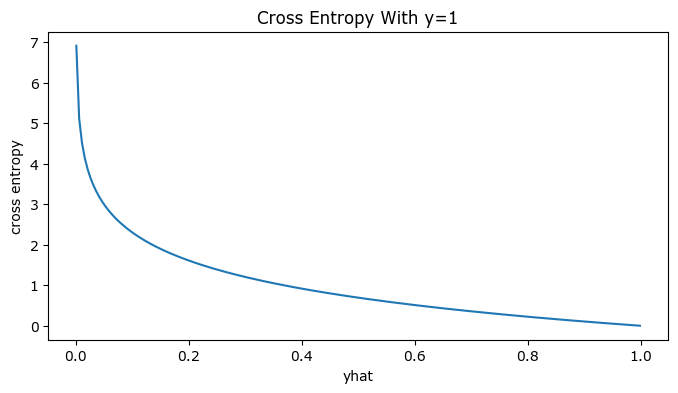

In [3]:
# Tính cross entropy theo yhat và y
def _cross_entropy(yhat, y):
  return -(y*np.log(yhat)+(1-y)*np.log((1-yhat)))
# Khởi tạo gía trị yhat từ 0 đến 1
yhat = np.linspace(0.001, 0.999, 200)

# Hàm visualize cross entropy
def _plot_crs(yhat, y):
  cross_entropy = _cross_entropy(yhat, y)
  plt.figure(figsize = (8, 4))
  plt.plot(yhat, cross_entropy)
  plt.xlabel('yhat')
  plt.ylabel('cross entropy')
  plt.title('Cross Entropy With y={}'.format(y))
  plt.show()

_plot_crs(yhat, y=1)

* Trường hợp $y=0$

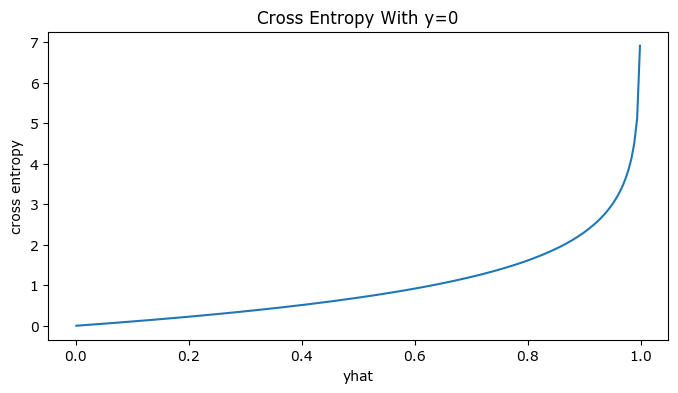

In [4]:
_plot_crs(yhat, y=0)

* Trường hợp $y=0.5$

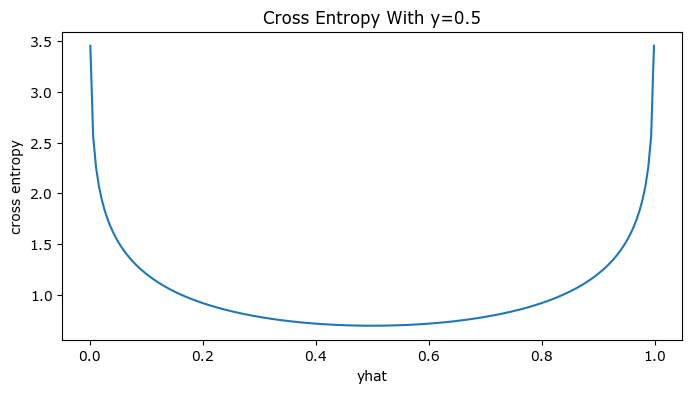

In [5]:
_plot_crs(yhat, y=0.5)

Biểu đồ chung cho cả 3 trường hợp

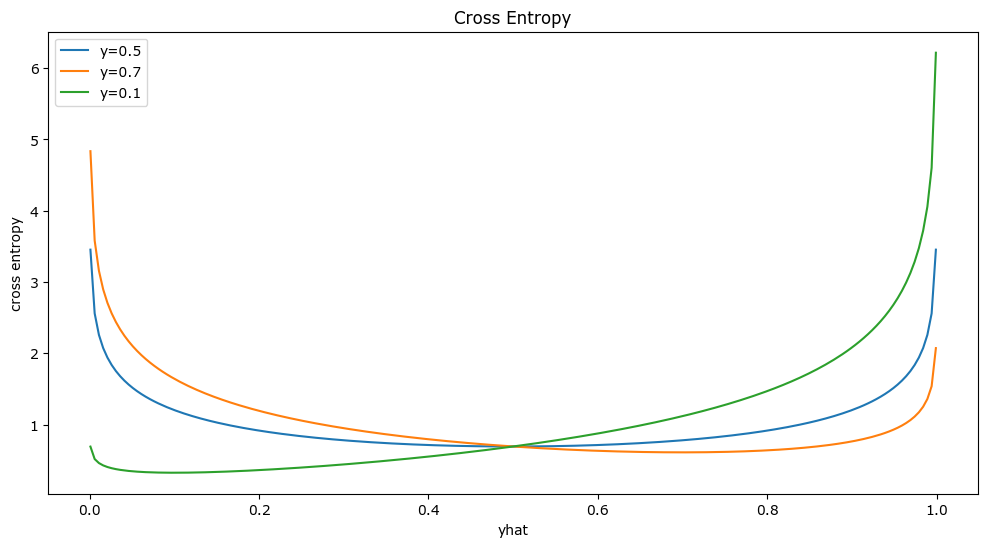

In [6]:
crs1 = _cross_entropy(yhat, y=0.5)
crs2 = _cross_entropy(yhat, y=0.7)
crs3 = _cross_entropy(yhat, y=0.1)
plt.figure(figsize = (12, 6))
plt.plot(yhat, crs1, label='y=0.5')
plt.plot(yhat, crs2, label='y=0.7')
plt.plot(yhat, crs3, label='y=0.1')
plt.xlabel('yhat')
plt.ylabel('cross entropy')
plt.title('Cross Entropy')
plt.legend(loc='best')
plt.show()

Như vậy ta nhận thấy giá trị cực tiểu của hàm _Cross Entropy_ luôn đạt được tại $y=\hat{y}$

## 1.7. Điều kiện cực trị của Cross Entropy

Để chứng minh cho nhận định giá trị của _Cross Entropy_ đạt cực tiểu tại $y = \hat{y}$ không quá khó. Ở phần này tôi sẽ đưa ra một chứng minh trực quan cho bạn nào yêu toán bằng phương pháp Lagrange. Đối với những bạn không thực sự quan tâm tới toán có thể xem mục 3.3 về thực hành.

### 1.7.1. Phương pháp nhân tử Lagrange (_Lagrange multiplier_)

Để giải bài toán cực trị của hàm _Cross Entropy_ thì chúng ta phải làm quen với phương pháp _nhân tử Lagrange_ trong tối ưu. Đây là một phương pháp giúp tìm kiếm cực trị địa phương cho các hàm mục tiêu $f(\mathbf{x})$ đi kèm với điều kiện ràng buộc là những đẳng thức hoặc bất đẳng thức đối với $\mathbf{x}$. Ví dụ về bài toán tối ưu với điều kiện ràng buộc:

$$\mathbf{x} = \arg \min_{\mathbf{x}} f(\mathbf{x})$$

Thoả mãn: $g(\mathbf{x}) = 0$

Trong đó $g(\mathbf{x}) = 0$ được gọi là điều kiện ràng buộc. Một bài toán có thể có một hoặc nhiều điều kiện ràng buộc. Chúng ta gọi chung những điều kiện mà $\mathbf{x}$ cần thoả mãn là _hệ điều kiện ràng buộc_.

Ý tưởng của phương pháp _nhân tử Lagrange_ là chuyển từ bài toán ràng buộc sang bài toán không ràng buộc và sử dụng khảo sát đạo hàm bậc nhất hàm Lagrange có dạng:

$$\mathcal{L}(\lambda, x_1, x_2) = f(\mathbf{x}) + \lambda g(\mathbf{x})$$

với $\lambda \geq 0$.

Thông qua tính đạo hàm bậc nhất theo $\lambda$ thì tại cực trị các điều kiện ràng buộc sẽ phải được thoả mãn hoặc $\lambda = 0$. Do đó chúng ta không cần thêm điều kiện ràng buộc. Bên dưới là ứng dụng của phương pháp nhân tử Lagrange để giải bài toán tối ưu.  


### 1.7.2. Điều kiện để Cross Entropy là cực trị

Giả sử $\mathbf{y} = [y_1, ..., y_C]$ là phân phối xác suất ground truth đã biết và $\hat{\mathbf{y}} = [\hat{y}_1, \dots , \hat{y}_C]$ là phân phối xác suất dự báo thỏa mãn điều kiện ràng buộc $\sum_{i=1}^{C} \hat{y}_i = 1$. Tìm nghiệm tối ưu của hàm _Cross Entropy_:

$$f(\mathbf{\hat{y}}|\mathbf{y}) = \sum_{i=1}^C {-y_i\log(\hat{y_i})}$$

Ở đây ta viết $f(\mathbf{\hat{y}} | \mathbf{y})$ có nghĩa là hàm $f(.)$ là một hàm phụ thuộc vào $\mathbf{\hat{y}}$ trong điều kiện đã biết trước $\mathbf{y}$. Mục tiêu của ta là đi tìm phân phối $\mathbf{\hat{y}}$ để hàm mục tiêu $f(.)$ là lớn nhất.

Ta có hàm _Lagrange_:

$$\begin{eqnarray}\mathcal{L}(\lambda, \mathbf{\hat{y}}) & = & f(\mathbf{\hat{y}}|\mathbf{y}) + \lambda (1-\sum_{i=1}^{C} \hat{y}_i) \\
& = & \sum_{i=1}^C {-y_i\log(\hat{y_i})} + \lambda (1-\sum_{i=1}^{C} \hat{y}_i) \end{eqnarray}$$

Hệ phương trình đạo hàm bậc nhất theo các biến $\hat{y}_i, \lambda$:


$$
\left\{
\begin{matrix}
    \nabla_{\hat{y}_i} \mathcal{L}(\lambda, \mathbf{\hat{y}}) &=& - {\frac{y_i}{\hat{y_i}}} - \lambda~~~ &, \forall i=\overline{1, C} ~~~ \\
    \nabla_{\lambda} \mathcal{L}(\lambda, \mathbf{\hat{y}}) &=& 1-\sum_{i=1}^{C} \hat{y}_i & ~~~ 
\end{matrix}
\right.$$

Điều kiện cần của cực trị là các phương trình đạo hàm bậc nhất bằng 0. Từ đó ta suy ra nghiệm $y_i = \hat{y}_i, \forall i=\overline{1, C}$. Tức là phân phối xác suất dự báo $\hat{\mathbf{y}}$ phải bằng ground truth $\mathbf{y}$. Đây chính là lý do vì sao chúng ta coi _Cross Entropy_ là một độ đo đánh giá mức độ tương đồng giữa phân phối xác suất của giá trị dự báo và ground truth.